In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## First Order Moments

\begin{align*}
E[X] &= E[\mu_X + \sigma_A A]\\
&= E[\mu_X]+E[\sigma_A A]\\
&=\mu_X + \sigma_AE[A]\\
&=\mu_X
\end{align*}

where we used the linearity properties of the expectation value operator and the fact that $E[A]=0$.

\begin{align*}
E[Y] &= E[\mu_Y + \sigma_A A+\sigma_B B]\\
&= E[\mu_Y]+E[\sigma_A A]+E[\sigma_B B]\\
&=\mu_Y + \sigma_AE[A]+\sigma_B E[B]\\
&=\mu_Y
\end{align*}

## Second Order Moments

\begin{align*}
E[X^2] &= E[\mu_X^2]+2E[\mu_X\sigma_A A] + E[\sigma_A^2 A^2]\\
&= \mu_X^2 + 2\mu_X\sigma_A E[A] + \sigma_A^2 E[A^2]
\end{align*}

Now using the fact that $E[A]=0$ and $1 = E[A^2]-E[A]^2 = E[A^2]$ (A is normally distributed with standard deviation 1) we have

\begin{align*}
E[X^2] &= \mu_X^2 + \sigma_A^2 \\
&= \mu_X^2 + \sigma_A^2\\
\end{align*}

We also have

\begin{align*}
E[Y^2] &= E[\mu_Y^2+\sigma_A^2A^2+\sigma_B^2B^2+2\mu_Y\sigma_A A + 2 \mu_y \sigma_B B + 2\sigma_A\sigma_B A B] \\
&=\mu_Y^2+\sigma_A^2E[A^2]+\sigma_B^2E[B^2]+2\mu_y\sigma_AE[A]+2\mu_y\sigma_BE[B]+2\sigma_A\sigma_bE[AB]\\
&=\mu_Y^2+\sigma_A^2+\sigma_B^2
\end{align*}
where we have used the fact that $E[A^2]=E[B^2]=1$, $E[A]=E[B]=0$, and finally that $\text{cov}[A,B]=E[(A-E[A])(B-E[B])]=E[AB]=0$ since $A$ and $B$ are assumed indepedent (and thus uncorrelated). We also have

\begin{align*}
E[XY]&=E[(\mu_X+\sigma_A A)(\mu_y +\sigma_A A + \sigma_B B)]\\
&=E[\mu_X\mu_Y+\mu_X\sigma_A A + \mu_X \sigma_B B + \mu_Y \sigma_A A + \sigma_A^2 A^2 + \sigma_A \sigma_B AB]\\
&=\mu_X\mu_y+\sigma_A^2
\end{align*}

where once again we have used the linearity properties of the expectation value operator and the fact that $E[A^2]=E[B^2]=1$, $E[A]=E[B]=0$, and $E[AB]=0$.


## Variances, Covariance, and Correlation Coefficient

Since we have now computed all the first and second order moments, we can compute the desired quantities

### Variances

Variance of $X$

\begin{align*}
\sigma_X^2 &= E[X^2]-E[X]^2\\
&=\mu_X^2+\sigma_A^2-\mu_X^2\\
&=\sigma_A^2
\end{align*}

Variance of $Y$

\begin{align*}
\sigma_Y^2 &= E[Y^2]-E[Y]^2\\
&=\mu_Y^2+\sigma_A^2+\sigma_B^2-\mu_Y^2\\
&=\sigma_A^2+\sigma_B^2
\end{align*}

### Covariance

\begin{align*}
\text{cov[X,Y]} &= E[(X-\mu_X)(Y-\mu_Y)]\\
&= E[XY]-\mu_YE[X]-\mu_XE[Y]+\mu_X\mu_Y\\
&=E[XY]-\mu_X\mu_y\\
&=\sigma_A^2
\end{align*}

### Correlation Coefficient

\begin{align*}
\rho_{XY} &= \frac{\text{cov}[X,Y]}{\sigma_X\sigma_Y}\\
&=\frac{\sigma_A^2}{\sigma_A\sqrt{\sigma_A^2+\sigma_B^2}}\\
&=\frac{1}{\sqrt{1+(\sigma_B/\sigma_A)^2}}
\end{align*}

# Question 2

In [3]:
def getSample(n, ux=1, uy=1, sA=1, sB=1):
    norm1 = np.random.randn(n)
    norm2 = np.random.randn(n)
    X = ux + sA*norm1
    Y = uy + sA*norm1+sB*norm2
    return X,Y

# Question 3

In [4]:
x, y = getSample(20, ux=5, uy=4, sA=3, sB=2)

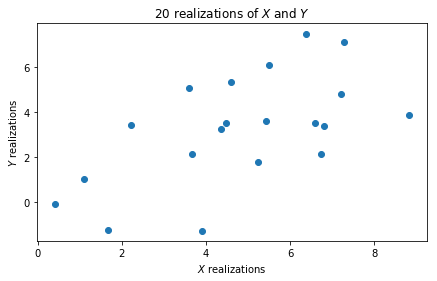

In [7]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x,y)
ax.set_xlabel('$X$ realizations')
ax.set_ylabel('$Y$ realizations')
ax.set_title('20 realizations of $X$ and $Y$')
plt.show()

Each coefficient can be found explicitly or by using methods in the numpy package. We show both here.

## Sample Means

Explicitly...

In [11]:
ux = np.sum(x)/len(x)
uy = np.sum(y)/len(y)
print('Mean of X realizations: {}'.format(ux))
print('Mean of Y realizations: {}'.format(uy))

Mean of X realizations: 4.80072503178613
Mean of Y realizations: 3.2441190632857477


Using python functions...

In [12]:
ux = np.mean(x)
uy = np.mean(y)
print('Mean of X realizations: {}'.format(ux))
print('Mean of Y realizations: {}'.format(uy))

Mean of X realizations: 4.80072503178613
Mean of Y realizations: 3.2441190632857477


## Sample Variances and Covariance

Explicitly...

In [20]:
Vx = np.sum((x-ux)**2)/(len(x)-1)
Vy = np.sum((y-uy)**2)/(len(y)-1)
print('Variance of X realizations: {}'.format(Vx))
print('Variance of Y realizations: {}'.format(Vy))

Variance of X realizations: 5.0622502602457615
Variance of Y realizations: 5.955068954758604


In [21]:
Vx = np.var(x, ddof=1)
Vy = np.var(y, ddof=1)
print('Variance of X realizations: {}'.format(Vx))
print('Variance of Y realizations: {}'.format(Vy))

Variance of X realizations: 5.0622502602457615
Variance of Y realizations: 5.955068954758604


In [17]:
Vx

5.0622502602457615

In [19]:
np.corrcoef(x,y)

array([[1.        , 0.59237014],
       [0.59237014, 1.        ]])